In [2]:
%matplotlib inline

In [3]:
import itertools

In [4]:
import numpy as np
import cv2

In [14]:
import torchvision.transforms

In [15]:
import matplotlib.pyplot as plt

In [16]:
import config
from utils.torch.datasets import PathologicalImagesDataset, PathologicalImagesDatasetMode
from utils.torch.transforms import ImageMaskTransformsCompose, RandomHorizontalFlip, \
RandomVerticalFlip, RandomTranspose, SamplePatch, MaskToTensor, CopyNumpy, Add, ContrastNormalization, \
Rotate, Rotate90n, MakeBorder
from utils.plotting import plot_image_and_mask

# Dataset

In [17]:
dataset = PathologicalImagesDataset(config.DATASET_TRAIN_DIR, mode=PathologicalImagesDatasetMode.All)

# Plot some images

In [18]:
i = 0

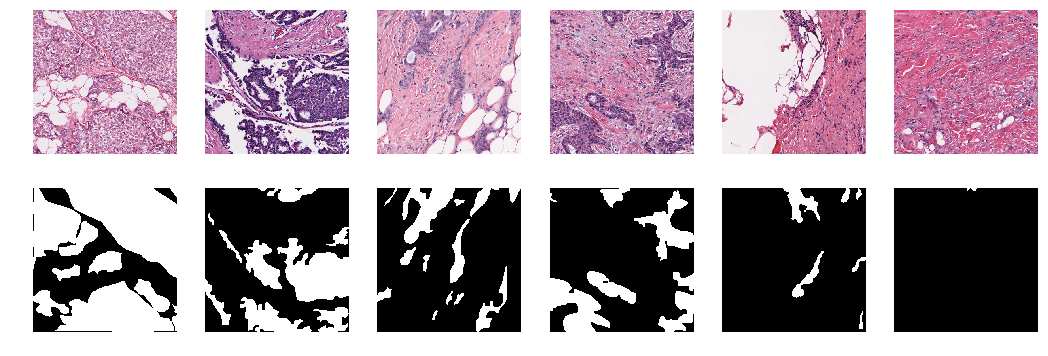

In [19]:
fig, (axes_img, axes_mask) = plt.subplots(2, 6, figsize=(18, 6))
for ax_img, ax_mask in zip(axes_img, axes_mask):
    image, mask = dataset[i]
    
    ax_img.imshow(image)
    ax_img.set_axis_off()

    ax_mask.imshow(mask, cmap='gray')
    ax_mask.set_axis_off()    

    i += 1

# Test augmentation

In [20]:
image, mask = dataset[1]

In [21]:
image.shape, mask.shape

((500, 500, 3), (500, 500))

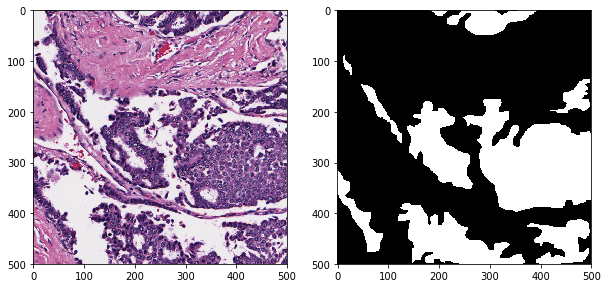

In [29]:
plot_image_and_mask(image, mask)

## Test some tranfrorms

In [13]:
transform = ImageMaskTransformsCompose([
#     SamplePatch(224),
#     RandomTranspose(),
#     RandomVerticalFlip(),
#     RandomHorizontalFlip(),
#     Add(-50, 50, per_channel=False),
#     ContrastNormalization(0.5, 1.5, per_channel=False),
    Rotate(-30, 30, mode='reflect'),
    Rotate90n(),
])

In [14]:
image_t, mask_t = transform(image, mask)

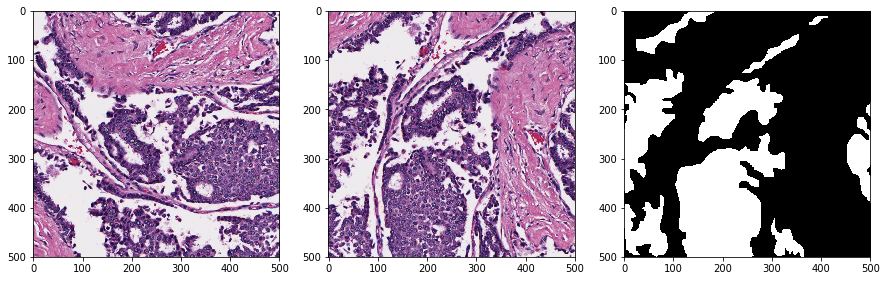

In [15]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
ax1.imshow(image)
ax2.imshow(image_t)
ax3.imshow(mask_t, cmap='gray')

## Test sample patch

In [16]:
image.shape, mask.shape

((500, 500, 3), (500, 500))

In [17]:
image[0:100,0:100].shape, mask[0:100,0:100].shape

((100, 100, 3), (100, 100))

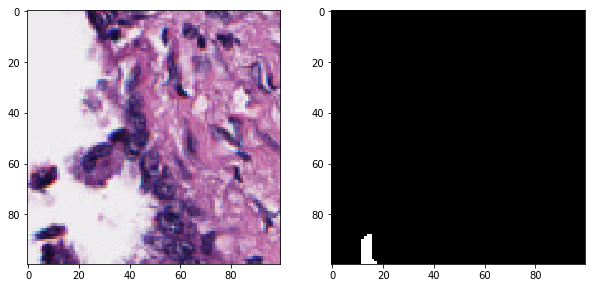

In [30]:
plot_image_and_mask(image[0:100,0:100], mask[0:100,0:100])

In [19]:
transform = ImageMaskTransformsCompose([
    SamplePatch(224)
])

In [ ]:
image_t, mask_t = transform(image, mask)
plot_image_and_mask(image_t, mask_t)

## Test image border

In [17]:
image_s = image[50:100, :50, :]
mask_s = mask[50:100, :50]

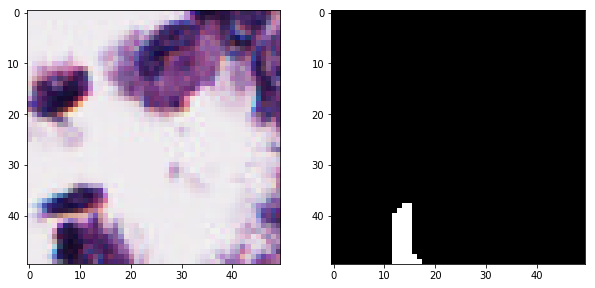

In [18]:
plot_image_and_mask(image_s, mask_s)

In [19]:
transform = ImageMaskTransformsCompose([
    MakeBorder(border_size=6)
])

In [26]:
image_t, mask_t = transform(image_s, mask_s)

In [27]:
image_t.shape, mask_t.shape

((62, 62, 3), (50, 50))

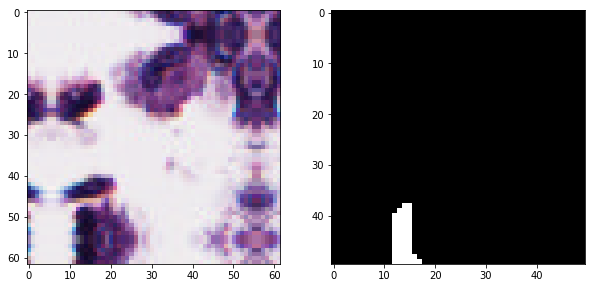

In [28]:
plot_image_and_mask(image_t, mask_t)

# Test numpy flip

In [5]:
a = np.array([
    [1,1],
    [2,2],
])

In [6]:
a

array([[1, 1],
       [2, 2]])

In [22]:
b = np.stack([a, a+4, a+6], axis=-1)

In [23]:
b

array([[[1, 5, 7],
        [1, 5, 7]],

       [[2, 6, 8],
        [2, 6, 8]]])

In [24]:
b.shape

(2, 2, 3)

In [25]:
b[:,:,0]

array([[1, 1],
       [2, 2]])

In [26]:
b[:,:,1]

array([[5, 5],
       [6, 6]])

In [27]:
b[:,:,2]

array([[7, 7],
       [8, 8]])

In [29]:
c = np.flipud(b)

In [30]:
c

array([[[2, 6, 8],
        [2, 6, 8]],

       [[1, 5, 7],
        [1, 5, 7]]])

In [31]:
c[:,:,0]

array([[2, 2],
       [1, 1]])

In [32]:
c[:,:,1]

array([[6, 6],
       [5, 5]])

In [33]:
c[:,:,2]

array([[8, 8],
       [7, 7]])

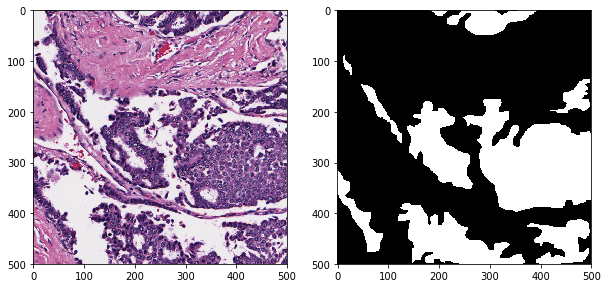

In [34]:
plot_image_and_mask(image, mask)

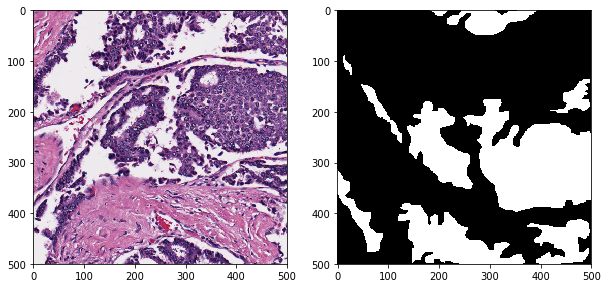

In [35]:
plot_image_and_mask(np.flipud(image), mask)